In [1]:
import parse
from learning_curve import *
import numpy as np

## Question 1
The Node data structure was not conceptually changed, we added attributes in order for us to be able to form the tree.

The attributes Node.attribute, Node.value where added so we could make a decision:

Node.attribute - splitting attribute for nodes

 Node.value - assigned value for leaf nodes. Both were kept whether the node was
a leaf or not in order to maintian one unified structure for the nodes.

Node.is_leaf was added for convenience (Checking len(self.children is also an option)).

## Question 2
We implemented the tree such that it can handle more than two classes , so a case of an "?" is also handled. We got good accuracy results doing that on the house votes dataset, even without pruning.

In [25]:
test_size = 45

data = parse.parse("house_votes_84.data")

#Split to train and test
train = data[:-test_size]
test_ = data[-test_size:]
print(f"Train dataset size : {len(train)}, Test dataset size : {len(test_)}")

#train
tree = ID3.ID3(train, "democrat")

#calculate accuarcy
acc = ID3.test(node = tree, examples=test_)
print(f"The tree has accuracy of : {100.0*acc:.2f}%")

Train dataset size : 390, Test dataset size : 45
The tree has accuracy of : 93.33%


## Question 3

## Question 4

Without pruning:

The training set has 300 examples.


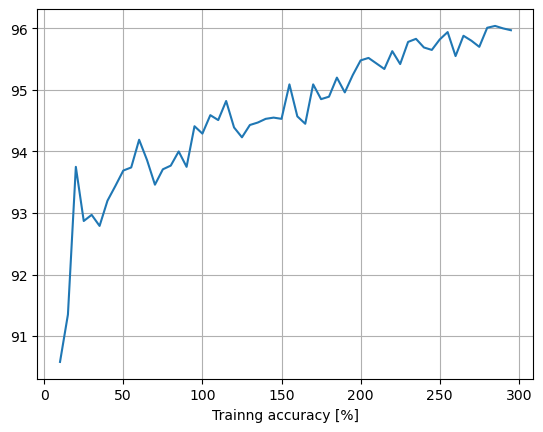

In [83]:
train_size = 300
test_size = 100
interations = 100

data = parse.parse("house_votes_84.data")

#Split to train and test and validate
test = data[:test_size]
train = data[test_size:test_size+train_size]
validate = data[:-test_size-train_size]

print(f"The training set has {len(train)} examples.")

example_size = np.arange(10,len(train),5)

learn_curve = np.zeros_like(example_size,dtype='float64')

for it in range(interations):
    learn_curve += get_learning_curve_data(examples_sizes=example_size,train_data=train,test_data=test,default = "democrat")

learn_curve /= interations

plot_learning_curve(example_size,learn_curve)

With pruning:

In [ ]:
train_size = 300
test_size = 100

data = parse.parse("house_votes_84.data")

#Split to train and test and validate
test = data[:test_size]
train = data[test_size:test_size+train_size]
validate = data[:-test_size-train_size]

print(f"The training set has {len(train)} examples.")

example_size = np.arange(10,len(train),5)

learn_curve = get_learning_curve_data(examples_sizes=example_size,train_data=train,test_data=test,default = "democrat",prune=True)

plot_learning_curve(example_size,learn_curve)